<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Clases/Clase8/02_Clase8_clasificaci%C3%B3n_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 9: Modelos de clasificación en R


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com

## Modelos de clasificación
En esta sesión evaluaremos otros modelos de clasificación y compararemos sus desempeños en el contexto de predicción de sobrevivencia al hundimiento del titanic.
Entre los modelos a comoparar consideraremos

 * Árboles de clasificación
 * Bagging
 * Random Forest
 * Suppor Vector Machines

Adicionalmente, compararemos los modelos a un nivel más general para entender la flexibilidad que proporcionan al momento de generar las fronteras de decisión.
## Titanic (Continuación)
Una vex realizado el paso de exploración, trataremos de predecir si una persona sobrevivirá al hundimiento del titanic utilizando árboles de clasificación y otros modelos

In [2]:
install.packages("randomForest") # para los random forest
install.packages("e1071") # para svm
install.packages("plotROC") # para las curvas de roc

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘gridSVG’, ‘shiny’, ‘plyr’




In [3]:
library(rpart) 
library(tidyverse)
library(randomForest)
library(e1071)
library(plotROC)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [4]:
load("train_test.RData") # descargar desde el repositorio 



In [5]:
# rpart -------------------------------------------------------------------

mod_arbol <- rpart(Survived ~ Pclass +
                     Sex +
                     Age +
                     SibSp +
                     Parch + 
                     Fare +
                     Embarked +
                     titulo + 
                     tipo_familia +
                     menor + 
                     madre,
                   data = train
)




In [6]:

# regresion logistica -----------------------------------------------------

mod_glm <- glm(Survived ~ Pclass +
                 Sex +
                 Age +
                 SibSp +
                 Parch +
                 Fare +
                 Embarked +
                 titulo +
                 tipo_familia +
                 menor +
                 madre
                 ,
               data = train,
               family = binomial(link = "logit")
               )

summary(mod_glm)





Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked + titulo + tipo_familia + menor + madre, 
    family = binomial(link = "logit"), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4330  -0.5585  -0.3809   0.5386   2.4101  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          3.181e+01  1.451e+03   0.022 0.982513    
Pclass              -1.155e+00  1.958e-01  -5.897 3.70e-09 ***
Sexmale             -1.612e+01  1.025e+03  -0.016 0.987444    
Age                 -3.030e-02  1.150e-02  -2.635 0.008405 ** 
SibSp               -1.356e-01  2.621e-01  -0.517 0.605009    
Parch                3.673e-02  2.940e-01   0.125 0.900579    
Fare                -5.843e-04  3.488e-03  -0.168 0.866969    
EmbarkedC           -1.267e+01  1.028e+03  -0.012 0.990167    
EmbarkedQ           -1.291e+01  1.028e+03  -0.013 0.989977    
EmbarkedS           -1.308e+01  1.028e+03  -0.013 0.9898

In [7]:
# random forest -----------------------------------------------------------
# A) 
# ranger es una mejor opcion
mod_rf <- randomForest(Survived ~ Pclass +
                         Sex +
                         Age +
                         SibSp +
                         Parch + 
                         Fare +
                         Embarked +
                         titulo + 
                         tipo_familia
                       , ntree = 600 
                       , mtry = 3 #por defecto dejaria 3  # Númerode covariables que el árbol puede escoger durante su definición
                       , data = train)

# recomendación: buscar librería ranger para la generación de random Forest




In [8]:
mod_bagg <- randomForest(Survived ~ Pclass +
                         Sex +
                         Age +
                         SibSp +
                         Parch + 
                         Fare +
                         Embarked +
                         titulo + 
                         tipo_familia
                       , ntree = 600
                       , mtry = 9 #al considerar todas las variables generamos un bagging
                       , data = train)



In [9]:
# SVM ---------------------------------------------------------------------

mod_svm <- svm(formula = Survived ~ Pclass +
                 Sex +
                 Age +
                 SibSp +
                 Parch + 
                 Fare +
                 titulo + 
                 tipo_familia
               , data = train
               , scale = T # resta media y divide por desv. estandar. 
               , type = "C-classification"
               , kernel = "radial"
               , probability = TRUE
               )


In [ ]:
# NOTA: No todas las implementaciones de los distintos modelos poseen la misma estructura de salida.
summary(mod_svm)

In [10]:
# predicciones a columnas -------------------------------------------------
test$pred_rf    <- predict(mod_rf,test,  type = "prob")[,2]
test$pred_bagg  <- predict(mod_bagg,test,type = "prob")[,2]
test$pred_glm   <- predict(mod_glm,test, type = "response")
test$pred_arbol <- predict(mod_arbol,test)[,2]


In [11]:
# En el caso del SVM
pred_svm <- predict(mod_svm,test,probability = TRUE )

test$pred_svm <- attr(pred_svm,"probabilities")[,2]


In [12]:
head(test)

,PassengerId,Survived,Pclass,apellido,titulo,nombre,Sex,Age,SibSp,Parch,⋯,Embarked,n_familia,tipo_familia,menor,madre,pred_rf,pred_bagg,pred_glm,pred_arbol,pred_svm
,<int>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,110,1,3,Moran,Miss,Bertha,female,4,1,0,⋯,Q,2,pequena,menor,no_madre,0.6933333,0.62000000,0.66938877,0.1142857,0.8155294
2,10,1,2,Nasser,Mrs,Nicholas (Adele Achem),female,14,1,0,⋯,C,2,pequena,menor,no_madre,0.9283333,0.99500000,0.92188132,0.9393939,0.8809417
3,492,0,3,Windelov,Mr,Einar,male,21,0,0,⋯,S,1,solo,adulto,no_madre,0.0200000,0.05000000,0.09770801,0.1648936,0.1609420
4,557,1,1,Duff Gordon,raro,"(Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48,1,0,⋯,C,2,pequena,adulto,no_madre,0.9366667,0.99000000,0.99999977,0.1648936,0.6655102
5,126,1,3,Nicola-Yarred,Master,Elias,male,12,1,0,⋯,C,2,pequena,menor,no_madre,0.6616667,0.58500000,0.79285830,0.6714286,0.5133641
6,873,0,1,Carlsson,Mr,Frans Olof,male,33,0,0,⋯,S,1,solo,adulto,no_madre,0.0700000,0.03666667,0.43144576,0.1648936,0.1640400


PANEL,group,AUC
<fct>,<int>,<dbl>
1,1,0.8145276
1,2,0.8665478
1,3,0.8702614
1,4,0.8804813
1,5,0.8664587


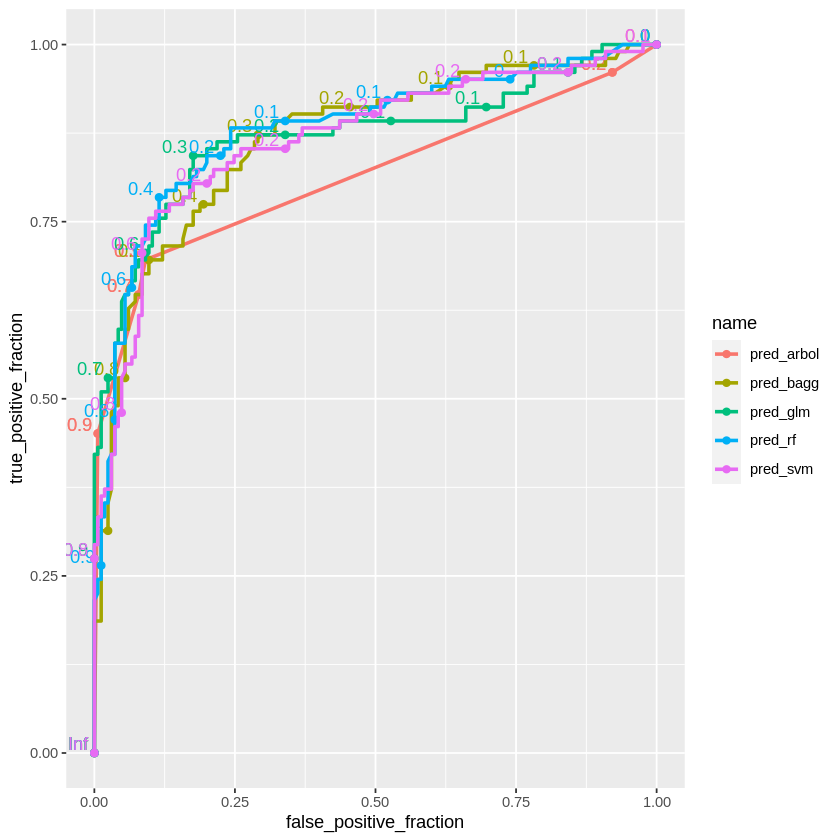

In [13]:
# Curvas de ROC y AUC
longdata <- melt_roc(test, "Survived", c( 
                                      "pred_svm"  
                                      ,"pred_rf"   
                                      ,"pred_bagg"
                                      ,"pred_glm"  
                                      ,"pred_arbol")
)

plot_roc <- longdata %>% 
    ggplot() +
    aes(d = strtoi(D), m = M, color = name) +
    geom_roc()

plot_roc

calc_auc(plot_roc)